In [ ]:
# xesmf is the package that can be used to regrid data
!conda install -c conda-forge xesmf -y

# Note: This is not added to the environment. This is the only
# instanct of xesmf and it has a large build time, so just added
# when needed in this notebook.

In [2]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# import xesmf as xe


In [10]:
# Createa source grid dataset
data_src = np.random.rand(10, 10)  # 4x3 array of random numbers
lat_src = np.linspace(-90, 90, 10)  # Source latitude values
lon_src = np.linspace(-180, 180, 10)  # Source longitude values

ds_src = xr.Dataset(
    {
        'air_temperature': (['lat', 'lon'], data_src),
        'lat': (['lat'], lat_src),
        'lon': (['lon'], lon_src),
    })

ds_src

<xarray.Dataset>
Dimensions:          (lat: 10, lon: 10)
Coordinates:
  * lat              (lat) float64 -90.0 -70.0 -50.0 -30.0 ... 50.0 70.0 90.0
  * lon              (lon) float64 -180.0 -140.0 -100.0 ... 100.0 140.0 180.0
Data variables:
    air_temperature  (lat, lon) float64 0.3085 0.1261 0.453 ... 0.4212 0.005909

In [17]:

# Create target grid dataset
data_tgt = np.random.rand(5, 5)  # 4x3 array of random numbers
lat_tgt = np.linspace(-90, 90, 5)  # Target latitude values
lon_tgt = np.linspace(-180, 180, 5)  # Target longitude values

ds_tgt = xr.Dataset(
    {
        'air_temperature': (['lat', 'lon'], data_tgt),
        'lat': (['lat'], lat_tgt),
        'lon': (['lon'], lon_tgt),
    })
ds_tgt


<xarray.Dataset>
Dimensions:          (lat: 5, lon: 5)
Coordinates:
  * lat              (lat) float64 -90.0 -45.0 0.0 45.0 90.0
  * lon              (lon) float64 -180.0 -90.0 0.0 90.0 180.0
Data variables:
    air_temperature  (lat, lon) float64 0.7639 0.7077 0.8052 ... 0.01684 0.6085

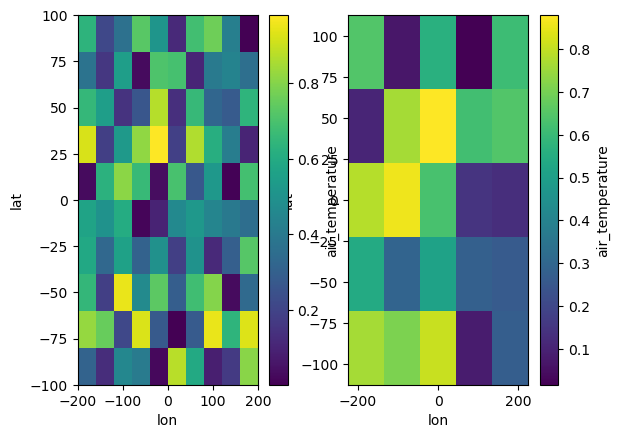

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ds_src.air_temperature.plot(ax=ax1)
ds_tgt.air_temperature.plot(ax=ax2)

In [ ]:
# Create a regridder
regridder = xe.Regridder(
    ds_src['air_temperature'],  # Source grid dataset
    ds_tgt['air_temperature'],  # Target grid dataset
    method='conservative'
)


In [ ]:
# Perform the regridding
regridded_data = regridder(ds_src['air_temperature'])

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

regridded_data.plot(ax=ax1)
ds_tgt.air_temperature.plot(ax=ax2)